In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [ ]:

X, y = make_blobs(n_samples = 1500, centers = 3, n_features = 2)

df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
df


,x,y,label
0,2.829448,8.999488,0
1,5.172546,-2.569738,2
2,3.764684,10.347386,0
3,4.859692,-1.429644,2
4,1.974201,2.575468,1
...,...,...,...
1495,5.772667,9.358126,0
1496,0.185299,2.022965,1
1497,3.214124,9.191366,0
1498,3.715351,-2.745103,2


array([[ 2.82944783,  8.9994883 ],
       [ 5.17254602, -2.56973769],
       [ 3.76468374, 10.34738613],
       ...,
       [ 3.21412353,  9.19136615],
       [ 3.7153509 , -2.7451032 ],
       [ 3.38646899,  9.94902588]])

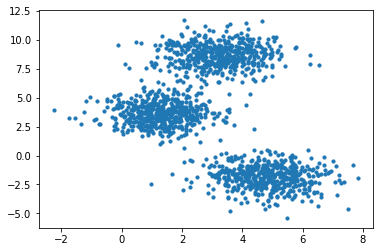

In [ ]:

plt.scatter(df['x'], df['y'], s = 10)

X = df[['x', 'y']]
X = X.to_numpy()
X


In [ ]:
# df = pd.read_csv("citrus.csv")
# df = df.sample(frac = 1).reset_index(drop = True)
# X = df.drop("name", axis = 1)
# X = X.drop("weight", axis = 1)
# X = X.to_numpy()
# X = preprocessing.StandardScaler(with_mean = False).fit_transform(X)
# pca = PCA(n_components = 2)
# X = pca.fit_transform(X)
# X

'\ndf = pd.read_csv("citrus.csv")\ndf = df.sample(frac = 1).reset_index(drop = True)\nX = df.drop("name", axis = 1)\nX = X.drop("weight", axis = 1)\nX = X.to_numpy()\nX = preprocessing.StandardScaler(with_mean = False).fit_transform(X)\npca = PCA(n_components = 2)\nX = pca.fit_transform(X)\nX\n'

In [ ]:
def multivariate_norm(X, mu, sigma):
    N = len(X)
    return (2 * np.pi) ** (-N/2) * np.linalg.det(sigma) ** (-1/2) * np.exp(-np.dot(np.dot((X - mu).T, np.linalg.inv(sigma)), (X - mu))/2)

In [ ]:
class GMM:
    def __init__(self, clusters = 2, iters = 50, c_names = None):
        self.K = clusters
        self.iters = iters
        #self.X = X
        #self.N = X.shape[0]
        #self.dims = dims
        self.log_likelihood = []
        if c_names == None:
            self.comp_names = [index for index in range(self.K)]
        else:
            self.comp_names = c_names

    def loglikelihood(self,X):
        ll = []
        for d in X:
            sum = 0
            for i in range(self.K):
                sum += self.pi[i] * multivariate_norm(d, self.mu[i], self.sigma[i])
            ll.append(np.log(sum))
        return np.sum(ll)


    def fit(self, X):
        self.X = X
        self.N = X.shape[0]
        self.dims = X.shape[1]

        sigma = np.zeros((self.K, self.dims, self.dims))
        for k in range(self.K):
            sigma[k] = np.eye(self.dims)

        self.sigma = sigma
        self.mu = np.random.rand(self.K, self.dims)*20 - 10
        self.pi = np.ones(self.K)/self.K
        self.r = np.zeros((self.N, self.K))

        self.log_likelihood = [self.loglikelihood(self.X)]

        for i in range(self.iters):
            self.EM()
            self.log_likelihood.append(self.loglikelihood(self.X))

    def EM(self):

        for n in range(len(X)):
            for k in range(self.K):
                self.r[n][k] = self.pi[k] * multivariate_norm(self.X[n], self.mu[k], self.sigma[k])
        self.r /= self.r.sum(axis=1, keepdims=True)

        rsum = self.r.sum(axis=0)
        self.pi = rsum / self.N
        self.mu = np.dot(self.r.T, self.X)
        self.mu /= rsum[:, None]
        for i in range(self.K):
            cov = np.expand_dims(self.X, axis=1) - self.mu[i]
            cov = np.matmul(cov.transpose([0, 2, 1]), cov)
            self.sigma[i] = np.matmul(cov.transpose(1, 2, 0), self.r[:, i] )
            self.sigma[i] /= rsum[i]


    def predict(self, X):
        probs = []

        for n in range(len(X)):
            probs.append([multivariate_norm(self.X[n], self.mu[k], self.sigma[k]) for k in range(self.K)])

        closest = []

        for prob in probs:
            closest.append(self.comp_names[np.argmax(prob)])

        return closest, self.mu

In [ ]:
gmm = GMM(clusters = 3, iters = 50)

In [ ]:
gmm.fit(X)

In [ ]:
cluster, centers = gmm.predict(X)

In [ ]:
print(centers)

[[ 1.26586022  3.64847198]
 [ 4.76716879 -1.83195032]
 [ 3.21033773  8.68499965]]


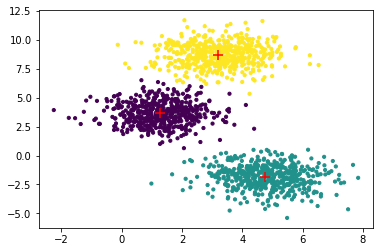

In [ ]:
plt.scatter(X[:,0], X[:,1], s =10, c = cluster)
plt.scatter(centers[:,0], centers[:,1], marker = "+", s = 90, c = 'red' )

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:

gm = GaussianMixture(n_components = 3, init_params = 'random', max_iter = 100)
gm.fit(X)
y_pred = gm.predict(X)
centers = gm.means_

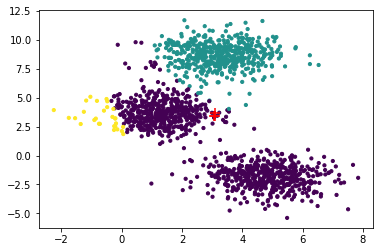

In [ ]:
plt.scatter(X[:,0], X[:,1], s =10, c = y_pred)
plt.scatter(centers[:,0], centers[:,1], marker = "+", s = 90, c = 'red' )

In [ ]:
gm.n_iter_

2